# Maximum Independent Set Problem

$$
\begin{align}
    \text{max} \quad & \sum_{i \in N} x_{i} \\
    \text{s.t} \quad & x_{i} + x_{j} \leq 1 & \forall \; i, j \in E \\
\end{align}
$$

In [1]:
import pyomo.environ as pyo
import matplotlib.pyplot as plt

from gcol.dataloader import load_instance
from gcol.mis.greedy import GreedyMIS
from gcol.mis.ilp import ilp_mis_from_graph
from gcol.plot import draw_colored_graph, draw_mis, draw_mis_gif

In [5]:
data = load_instance("instances/input_32.txt")

In [6]:
greedy = GreedyMIS(data["nodes"], data["edges"])
greedy.solve(local_search=True, save_history=True)
print(greedy.cost)

5


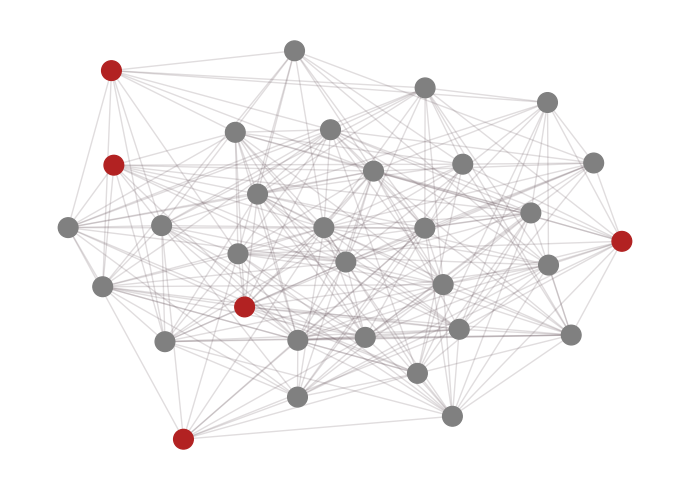

In [7]:
fig, ax = plt.subplots(figsize=[7, 5], dpi=100)
draw_mis(greedy.N, ax=ax, plot_margins=False, use_labels=0, edge_alpha=0.2, edge_color="#68555D", layout_iter=1000, seed=12)
fig.tight_layout()
plt.show()

In [ ]:
draw_mis_gif(
    "mis_history_loop_32.gif", greedy.N, greedy.history, use_labels=0, edge_alpha=0.2, edge_color="#68555D",
    layout_iter=1000, seed=12, figsize=[7, 5], dpi=200, plot_margins=False,
    duration=500,
)

In [8]:
ilp = ilp_mis_from_graph(greedy)

In [9]:
solver = pyo.SolverFactory("appsi_highs")
res = solver.solve(ilp, tee=True)
print(res)

Running HiGHS 1.5.3 [date: 2023-05-16, git hash: 594fa5a9d]
Copyright (c) 2023 HiGHS under MIT licence terms
Presolving model
516 rows, 32 cols, 1032 nonzeros
258 rows, 32 cols, 516 nonzeros
70 rows, 32 cols, 344 nonzeros
70 rows, 32 cols, 344 nonzeros
Objective function is integral with scale 1

Solving MIP model with:
   70 rows
   32 cols (32 binary, 0 integer, 0 implied int., 0 continuous)
   344 nonzeros

        Nodes      |    B&B Tree     |            Objective Bounds              |  Dynamic Constraints |       Work      
     Proc. InQueue |  Leaves   Expl. | BestBound       BestSol              Gap |   Cuts   InLp Confl. | LpIters     Time

         0       0         0   0.00%   9               -inf                 inf        0      0      0         0     0.1s
 S       0       0         0   0.00%   9               -0                 Large        0      0      0         0     0.1s
         0       0         0   0.00%   7.107142857     -0                 Large        0      0  

In [10]:
colors = []
nodes = []
for n in ilp.N:
    nodes.append(n)
    if round(ilp.x[n].value, ndigits=0) == 1:
        colors.append(1)
    else:
        colors.append(0)

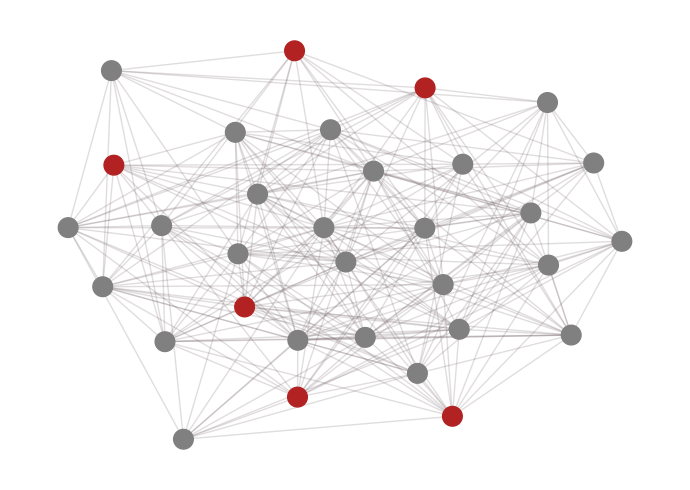

In [11]:
fig, ax = plt.subplots(figsize=[7, 5], dpi=100)
draw_colored_graph(nodes, colors, data["edges"], ax=ax, plot_margins=False, plot_colors=["grey", "firebrick"], use_labels=0, edge_alpha=0.2, edge_color="#68555D", layout_iter=1000, seed=12)
fig.tight_layout()
plt.show()